In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [2]:
img = cv2.imread("img1.jpg")

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

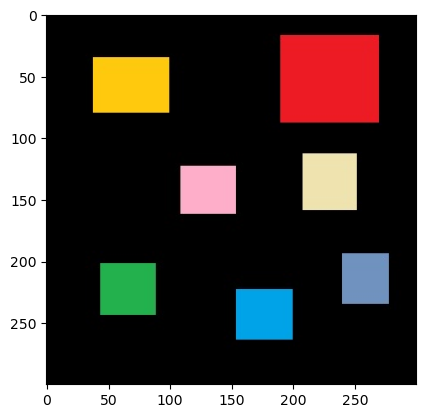

In [4]:
plt.imshow(img)

In [8]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [9]:
pixel_luminosity_drop_threshold = 99


for x in range(img_HSV.shape[0]):
    for y in range(img_HSV.shape[1]):
        
        luminosity_channel = 2
        if boxes_img_HSV[x, y, luminosity_channel] <= pixel_luminosity_drop_threshold: # If value/luminosity is less than 10% then remove it
            
            
            boxes_img_HSV[x,y, :] = 0

In [10]:

img = cv2.cvtColor(img_HSV, cv2.COLOR_HSV2RGB)


original_gray = cv2.cvtColor(boxes_img_original, cv2.COLOR_RGB2GRAY)

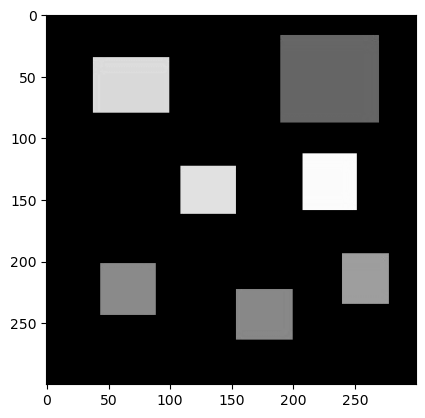

In [11]:
plt.imshow(original_gray, cmap="gray")

In [13]:
original_gray = cv2.GaussianBlur(original_gray, (11, 11), cv2.BORDER_DEFAULT)

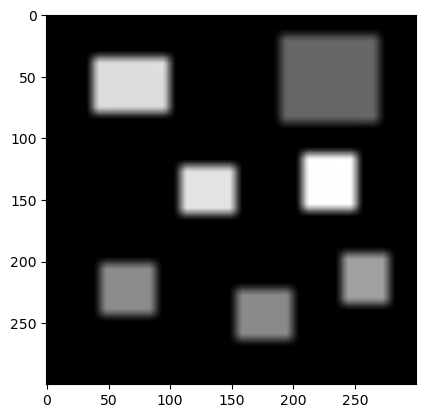

In [14]:
cv2.imwrite("preprocessed_gray_image.jpg", original_gray)
plt.imshow(original_gray, cmap="gray")

In [15]:
class CustomIntensityBasedintensitySliceer():
 
    def __init__(self, input_image, K_Objects):
        
        self.in_img = input_image
        self.K_Objects = K_Objects
    
    
    def performIntensityBasedintensitySliceation(self):
      

        intensity_distributions = self.__computeIntensityDistributions()
        
        
       
        intensitySliceed_images_along_with_intensity = self.__intensitySliceObjectsFromImage(intensity_distributions)
        

       
        return intensitySliceed_images_along_with_intensity
        
        
        
      
        
        
    

    def __computeIntensityDistributions(self):
        
    
        unique_intensities = {}

  
        for x in range(self.in_img.shape[0]):
            for y in range(self.in_img.shape[1]):

                current_pixel = self.in_img[x,y]

                if current_pixel not in unique_intensities:
                    unique_intensities[current_pixel] = 1
                else:
                    unique_intensities[current_pixel] += 1
                
        return unique_intensities
    
   
    def __intensitySliceObjectsFromImage(self, intensities):
        
       
        intensities = dict(sorted(intensities.items(), key=lambda item: item[1], reverse=True))
        

       
        intensitySliceed_images = []
        

        for intensity in intensities:

          
            new_image = np.zeros_like(self.in_img)
            
          
            for x in range(new_image.shape[0]):
                for y in range(new_image.shape[1]):
                    
                    if self.in_img[x,y] == intensity:
                    
                        new_image[x,y] = 255
                        
            intensitySliceed_images.append((new_image, intensity))
        
        return intensitySliceed_images[1:self.K_Objects+1]
    

In [17]:

customintensitySliceer = CustomIntensityBasedintensitySliceer(original_gray, K_Objects=7)

In [18]:
Sliceed_images = customintensitySliceer.performIntensityBasedintensitySliceation()

In [27]:
for i,seg_img in enumerate(Sliceed_images):
    cv2.imwrite("./slicedimg/" + str(i) + ".jpg", seg_img[0])

In [28]:
distance_threshold_to_drop_pixel = 50 

for i, seg_img in enumerate(Sliceed_images):

    avg_x = 0
    avg_y = 0
    img = seg_img[0]
    valid_intensity_count = 0
   
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):

            if img[x,y] == 255: 
                avg_x += x
                avg_y += y
                valid_intensity_count += 1
    
    avg_x /= valid_intensity_count
    avg_y /= valid_intensity_count

    print(f"Average-X={avg_x} and Average-Y={avg_y}")

   
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):

            if img[x,y] == 255:
                if (abs(x - avg_x) > distance_threshold_to_drop_pixel) or (abs(y - avg_y) > distance_threshold_to_drop_pixel):
                    img[x,y] = 0


Average-X=54.85277947464875 and Average-Y=225.9798411728772
Average-X=222.13119834710744 and Average-Y=65.90702479338843
Average-X=61.71498054474708 and Average-Y=71.04474708171206
Average-X=141.51105937136205 and Average-Y=131.0419091967404
Average-X=241.1051282051282 and Average-Y=175.77307692307693
Average-X=213.4269819193324 and Average-Y=259.4297635605007
Average-X=136.40520984081041 and Average-Y=227.9782923299566


In [29]:
for i,seg_img in enumerate(Sliceed_images):
    cv2.imwrite("./slicedimg/" + str(i) + ".jpg", seg_img[0])

In [30]:
font  = cv2.FONT_HERSHEY_SIMPLEX

for i, seg_img in enumerate(Sliceed_images):

    avg_x = 0
    avg_y = 0
    img = seg_img[0]
    valid_intensity_count = 0 

   
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y] == 255:
                avg_x += y
                avg_y += x
                valid_intensity_count += 1
                
    avg_x /= valid_intensity_count
    avg_y /= valid_intensity_count

    print(f"Average-X={avg_x} and Average-Y={avg_y}")

   
    cv2.putText(img, str(valid_intensity_count),(int(abs(avg_x - 13)), int(abs(avg_y + 6))), font, 0.3, 0  , 1,cv2.LINE_AA)

Average-X=225.9798411728772 and Average-Y=54.85277947464875
Average-X=65.90702479338843 and Average-Y=222.13119834710744
Average-X=71.04474708171206 and Average-Y=61.71498054474708
Average-X=131.0419091967404 and Average-Y=141.51105937136205
Average-X=175.77307692307693 and Average-Y=241.1051282051282
Average-X=259.4297635605007 and Average-Y=213.4269819193324
Average-X=227.9782923299566 and Average-Y=136.40520984081041


In [31]:
for i,seg_img in enumerate(Sliceed_images):
    cv2.imwrite("./slicedimg/" + str(i) + ".jpg", seg_img[0])

In [33]:
target_intensities = [90, 123, 194, 201, 122, 141, 224]


base_path = "./imagessd"

for counter,I in enumerate(target_intensities):

    
    thresholded_img = cv2.threshold(boxes_img_original_gray, I-10, I+10, cv2.THRESH_BINARY)
    cv2.imwrite(f"{base_path}/{counter}.jpg", thresholded_img[1])